In [7]:
# Import essential libraries for data manipulation, visualization, and association rule mining.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Import the matplotlib.pyplot module
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns import apriori, association_rules


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
# Load the dataset from an Excel file into a DataFrame and display the first few rows.
data = pd.read_excel('/content/Online Retail.xlsx')
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
# Remove any rows where 'InvoiceNo' is missing
data = data.dropna(subset=['InvoiceNo'])

# Remove any rows where 'Description' is missing
data = data.dropna(subset=['Description'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


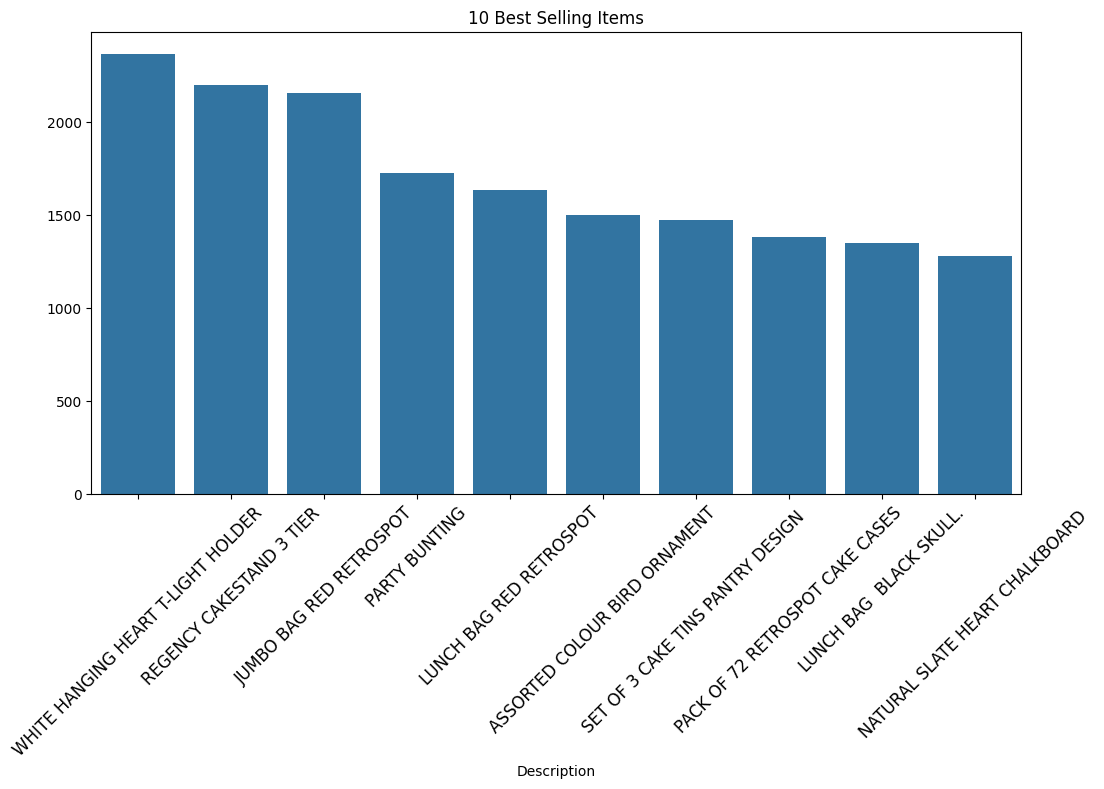

In [10]:
# Create a bar plot to visualize the top 10 best-selling items from the data.
plt.figure(figsize=(12,6))

sns.barplot(x = data['Description'].value_counts()[:10].index,
           y = data['Description'].value_counts()[:10].values)
plt.xticks(size=12, rotation=45)
plt.title('10 Best Selling Items')
plt.show()

In [11]:
#Convert the InvoiceNo and Quantity column to string
data["InvoiceNo"] = data["InvoiceNo"].astype('str')
#Convert the Quantity column to int
data['Quantity'] = data['Quantity'].astype(int)

len(data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


540455

In [12]:
#Create a basket_encoded DataFrame to represent transaction data in a one-hot encoded format
basket_encoded = (
    data
    .groupby(['InvoiceNo', 'Description'])["Quantity"]
    .sum()
    .unstack()
    .reset_index()
    .fillna(0)
    .set_index("InvoiceNo")
    .applymap(lambda x: 1 if x > 0 else 0)
)

basket_encoded.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-12-f93f7cea9803>:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x: 1 if x > 0 else 0)


Description,20713,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Filter invoices to keep only those with two or more distinct items purchased.
Filter_basket = basket_encoded[(basket_encoded > 0).sum(axis=1) >= 2]

Filter_basket

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Description,20713,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536370,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581585,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Apply the Apriori algorithm to find frequent itemsets in the basket_filtered DataFrame
# Set a minimum support threshold of 0.03, meaning an itemset must appear in at least 3% of transactions to be considered frequent.
# Finally, display the top 10 frequent itemsets.
frequent_itemsets = apriori(Filter_basket, min_support=0.03, use_colnames=True).sort_values("support",ascending=False)
frequent_itemsets.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
144,0.122205,(WHITE HANGING HEART T-LIGHT HOLDER)
61,0.113317,(JUMBO BAG RED RETROSPOT)
115,0.107264,(REGENCY CAKESTAND 3 TIER)
96,0.091122,(PARTY BUNTING)
79,0.085233,(LUNCH BAG RED RETROSPOT)
9,0.079234,(ASSORTED COLOUR BIRD ORNAMENT)
125,0.075035,(SET OF 3 CAKE TINS PANTRY DESIGN )
90,0.071982,(PACK OF 72 RETROSPOT CAKE CASES)
73,0.069310,(LUNCH BAG BLACK SKULL.)
86,0.068055,(NATURAL SLATE HEART CHALKBOARD )


In [15]:
# Generate association rules with confidence and lift
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display rules sorted by lift
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
0,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.044989,0.397016,5.987242
1,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.044989,0.678454,5.987242
2,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.041880,0.756650,13.053107
3,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.041880,0.722484,13.053107
4,(JUMBO BAG RED RETROSPOT),(JUMBO STORAGE BAG SUKI),0.039481,0.348412,5.396265
5,(JUMBO STORAGE BAG SUKI),(JUMBO BAG RED RETROSPOT),0.039481,0.611486,5.396265
6,(JUMBO BAG RED RETROSPOT),(JUMBO SHOPPER VINTAGE RED PAISLEY),0.037081,0.327238,5.111487
7,(JUMBO SHOPPER VINTAGE RED PAISLEY),(JUMBO BAG RED RETROSPOT),0.037081,0.579216,5.111487
8,(LUNCH BAG BLACK SKULL.),(LUNCH BAG RED RETROSPOT),0.034955,0.504327,5.917053
9,(LUNCH BAG RED RETROSPOT),(LUNCH BAG BLACK SKULL.),0.034955,0.410109,5.917053


In [16]:
# Generate association rules based on the 'lift' metric
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Sort the rules by 'lift' in descending order
sorted_rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False)

# Get the top 10 rules based on lift
top_10_rules = sorted_rules.head(10)

# Display the top 10 rules
top_10_rules


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
13,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.034518,0.831800,15.028131
12,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.034518,0.623645,15.028131
17,(ROSES REGENCY TEACUP AND SAUCER ),(PINK REGENCY TEACUP AND SAUCER),0.032664,0.563500,13.578784
16,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.032664,0.787122,13.578784
2,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.041880,0.756650,13.053107
3,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.041880,0.722484,13.053107
10,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.034900,0.609524,11.464049
11,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.034900,0.656410,11.464049
29,(PAPER CHAIN KIT 50'S CHRISTMAS ),(PAPER CHAIN KIT VINTAGE CHRISTMAS),0.030101,0.478751,10.758992
28,(PAPER CHAIN KIT VINTAGE CHRISTMAS),(PAPER CHAIN KIT 50'S CHRISTMAS ),0.030101,0.676471,10.758992
